**Feature Engineering And Exploratory Data Analysis**

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 


In [2]:
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features #this is the df
y = cdc_diabetes_health_indicators.data.targets 

In [3]:
# metadata 
print(cdc_diabetes_health_indicators.metadata)   

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [4]:
# variable information 
print(cdc_diabetes_health_indicators.variables) 

                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

In [5]:
import pandas as pd

df = pd.concat([X, y], axis=1)

df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


/var/folders/cw/q0sysq652hn1db146xg3r26m0000gn/T/ipykernel_55508/1546904579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_binary', data=df, palette='inferno')


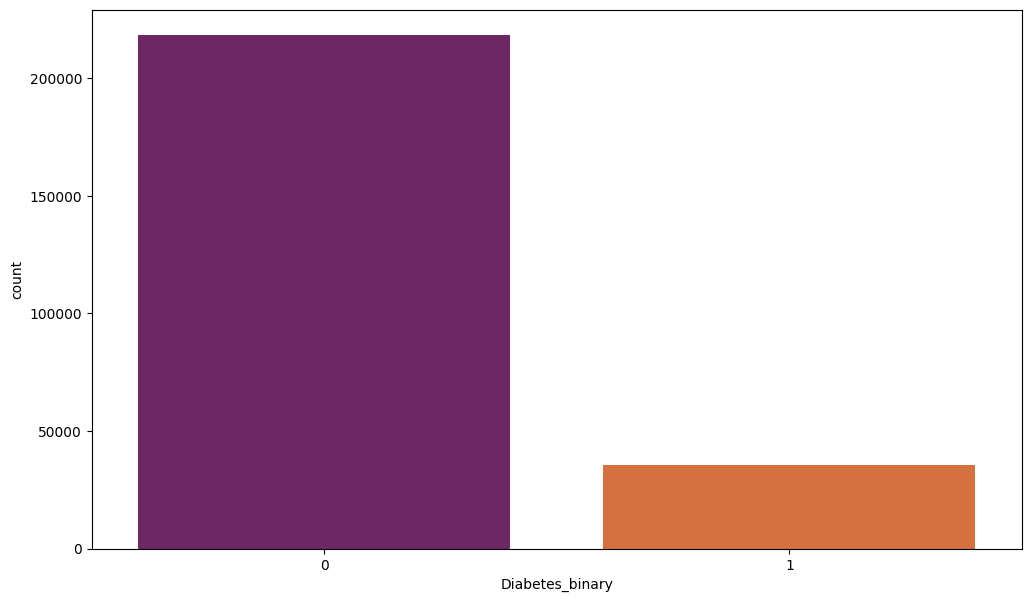

In [6]:
# Display countplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 7))
sns.countplot(x='Diabetes_binary', data=df, palette='inferno')
plt.show()


/var/folders/cw/q0sysq652hn1db146xg3r26m0000gn/T/ipykernel_55508/1279057723.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=balanced_data, x='Diabetes_binary',palette='plasma')


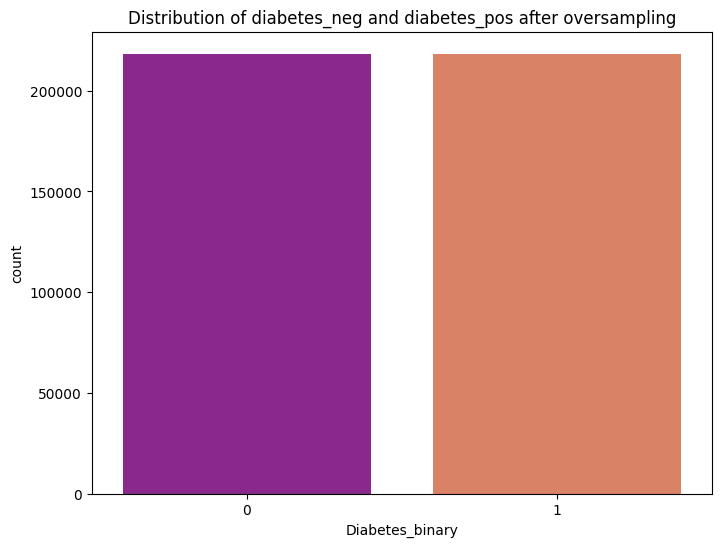

In [7]:
import pandas as pd
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

# Separating the majority and minority classes
diabetes_neg = df[df.Diabetes_binary == 0]
diabetes_pos = df[df.Diabetes_binary == 1]

# Upsampling the minority class to match the majority class
diabetes_pos_upsampled = resample(diabetes_pos,
                                  replace=True,  # Sample with replacement
                                  n_samples=len(diabetes_neg),  # Match the number of samples in the majority class
                                  random_state=42)

# Concatenating the upsampled minority class with the majority class
balanced_data = pd.concat([diabetes_neg, diabetes_pos_upsampled])

# Plotting the counts of the balanced dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=balanced_data, x='Diabetes_binary',palette='plasma')
plt.title('Distribution of diabetes_neg and diabetes_pos after oversampling')
plt.xlabel('Diabetes_binary')
plt.show()

In [8]:
df.shape

(253680, 22)

In [9]:
balanced_data.shape

(436668, 22)

In [10]:
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.139333
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.346294
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [11]:
balanced_data.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,436668.000000,436668.000000,436668.00000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,...,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000
mean,0.564287,0.527018,0.97556,29.874939,0.474812,0.062079,0.147671,0.704054,0.613723,0.788350,...,0.093474,2.837662,3.704835,5.796617,0.252485,0.456944,8.595070,4.923212,5.697926,0.500000
std,0.495851,0.499270,0.15441,7.161852,0.499366,0.241300,0.354774,0.456467,0.486896,0.408479,...,0.291096,1.112645,8.100461,10.054643,0.434438,0.498143,2.853473,1.028523,2.173935,0.500001
min,0.000000,0.000000,0.00000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.00000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,1.000000,1.00000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,0.500000
75%,1.000000,1.000000,1.00000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,4.000000,2.000000,5.000000,1.000000,1.000000,11.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.00000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [12]:
#Target Distribution
df.groupby('Diabetes_binary').size()

Diabetes_binary
0    218334
1     35346
dtype: int64

In [13]:
#Target Distribution
balanced_data.groupby('Diabetes_binary').size()

Diabetes_binary
0    218334
1    218334
dtype: int64

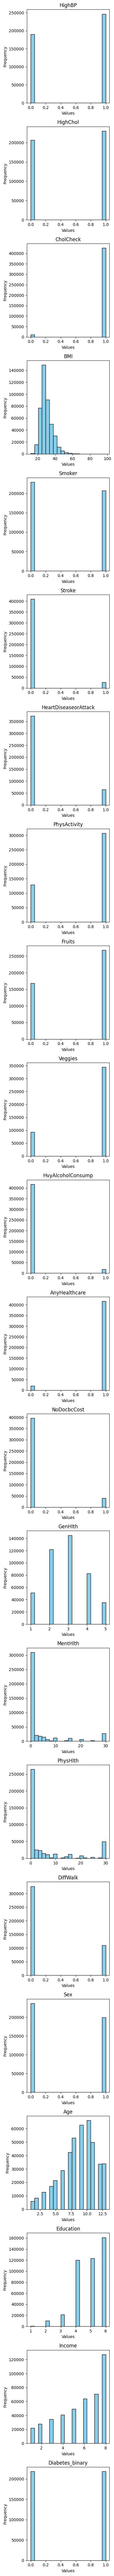

In [14]:
# histograms
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set up the number of rows and columns for subplots
num_rows = len(balanced_data.columns)
num_cols = 1  # One column for individual histograms

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(4, 4 * num_rows))

# Flatten the axes if there's only one row
if num_rows == 1:
    axes = [axes]

# Plot individual histograms
for i, column in enumerate(balanced_data.columns):
    axes[i].hist(balanced_data[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Frequency")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

**Regression Analysis**

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import stats

# Choose the target variable and features
target_variable = "Diabetes_binary"
features = balanced_data.drop("Diabetes_binary", axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, balanced_data["Diabetes_binary"], test_size=0.1, random_state=42)

In [16]:
import statsmodels.api as sm
from scipy import stats
import pandas as pd
import numpy as np

# T-test Analysis
t_test_results = pd.DataFrame(columns=['T-Score', 'P-Value'])

for column in features.columns:
    t_stat, p_value = stats.ttest_ind(features[column], balanced_data['Diabetes_binary'])
    t_test_results.loc[column] = [t_stat, p_value]

In [17]:
#Display Results
print("----- T-test Analysis -----")
t_test_results

----- T-test Analysis -----


,T-Score,P-Value
HighBP,60.327382,0.000000e+00
HighChol,25.267628,8.150766e-141
CholCheck,600.524271,0.000000e+00
BMI,2703.780916,0.000000e+00
Smoker,-23.554166,1.242978e-122
Stroke,-521.238596,0.000000e+00
HeartDiseaseorAttack,-379.759638,0.000000e+00
PhysActivity,199.166733,0.000000e+00
Fruits,107.678093,0.000000e+00
Veggies,295.122356,0.000000e+00


In [18]:
# F-test Analysis
f_stat, f_p_value = stats.f_oneway(*[features[column] for column in features.columns])

In [19]:
#Display Results
print("\n----- F-test Analysis -----")
print(f"F-statistic: {f_stat}")
print(f"P-value: {f_p_value}")


----- F-test Analysis -----
F-statistic: 1679779.2756955938
P-value: 0.0


In [20]:
# Confidence Interval Analysis
confidence_intervals = pd.DataFrame(columns=['Lower Bound', 'Upper Bound'])

for column in features.columns:
    mean, std, n = features[column].mean(), features[column].std(), len(features[column])
    margin_of_error = stats.t.ppf(0.975, df=n-1) * (std / np.sqrt(n))
    
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    
    confidence_intervals.loc[column] = [lower_bound, upper_bound]

In [21]:
#Display Results
print("\n----- Confidence Intervals -----")
confidence_intervals


----- Confidence Intervals -----


,Lower Bound,Upper Bound
HighBP,0.562816,0.565758
HighChol,0.525537,0.528499
CholCheck,0.975102,0.976018
BMI,29.853697,29.896181
Smoker,0.473330,0.476293
Stroke,0.061364,0.062795
HeartDiseaseorAttack,0.146618,0.148723
PhysActivity,0.702700,0.705408
Fruits,0.612278,0.615167
Veggies,0.787138,0.789561


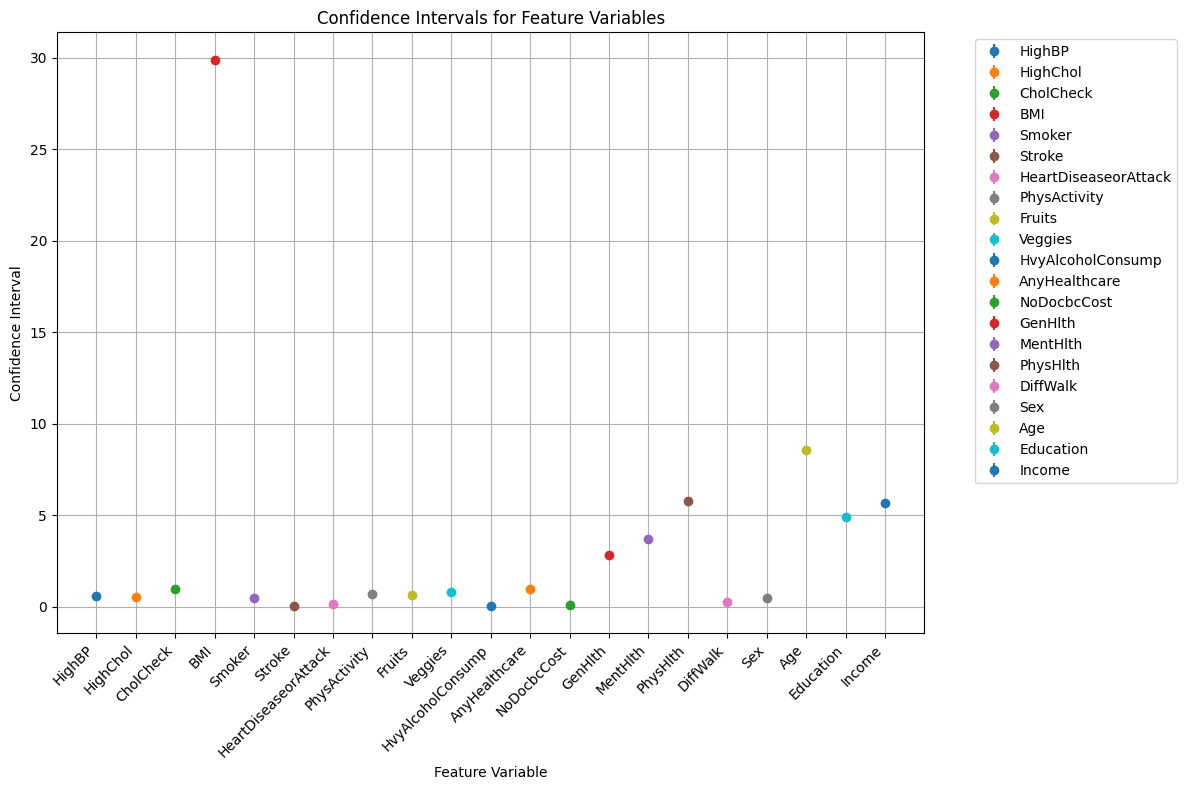

In [22]:
import matplotlib.pyplot as plt

# Plot Confidence Intervals
plt.figure(figsize=(12, 8))
for column in confidence_intervals.index:
    plt.errorbar(column, confidence_intervals.loc[column, 'Lower Bound'], yerr=confidence_intervals.loc[column, 'Upper Bound'] - confidence_intervals.loc[column, 'Lower Bound'], fmt='o', label=column)

plt.title('Confidence Intervals for Feature Variables')
plt.xlabel('Feature Variable')
plt.ylabel('Confidence Interval')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.savefig('confidence.png')
plt.show()


In [23]:
# Combine T-scores and confidence intervals into a single DataFrame
features_info = pd.concat([t_test_results, confidence_intervals], axis=1)

# Sort the DataFrame based on the absolute magnitude of T-scores
sorted_features_info = features_info.reindex(features_info['T-Score'].abs().sort_values(ascending=False).index)

# Extract top 5 features
top_5_features = sorted_features_info.head(5).index.tolist()

In [24]:
print("Top 5 Feature Variables:")
print(top_5_features)

Top 5 Feature Variables:
['BMI', 'Education', 'Age', 'Income', 'GenHlth']


In [25]:
# Step 7: Final Regression Model and Prediction
final_model = LinearRegression()
final_model.fit(X_train[top_5_features], y_train)
y_pred_train = final_model.predict(X_train[top_5_features])
y_pred_test = final_model.predict(X_test[top_5_features])

In [26]:
# Creating a statsmodels OLS model
ols_model = sm.OLS(y_train, sm.add_constant(X_train[top_5_features]))

# Fitting the model
ols_results = ols_model.fit()

# Displaying the model summary
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:        Diabetes_binary   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                 2.717e+04
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:32:36   Log-Likelihood:            -2.2690e+05
No. Observations:              393001   AIC:                         4.538e+05
Df Residuals:                  392995   BIC:                         4.539e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5518      0.006    -95.324      0.0

In [27]:
# R-squared, Adjusted R-square, AIC, BIC, and MSE
# R-squared and Adjusted R-squared
r_squared_top_5 = ols_results.rsquared
adj_r_squared_top_5 = ols_results.rsquared_adj

# AIC and BIC
aic_top_5 = ols_results.aic
bic_top_5 = ols_results.bic

# MSE for training and test set
mse_train_top_5 = mean_squared_error(y_train, ols_results.predict(sm.add_constant(X_train[top_5_features])))
mse_test_top_5 = mean_squared_error(y_test, ols_results.predict(sm.add_constant(X_test[top_5_features])))


In [28]:
# Display the results
print("----- Performance Metrics for Top 5 Features -----")
print(f"R-squared: {r_squared_top_5}")
print(f"Adjusted R-squared: {adj_r_squared_top_5}")
print(f"AIC: {aic_top_5}")
print(f"BIC: {bic_top_5}")
print(f"MSE (Training): {mse_train_top_5}")
print(f"MSE (Test): {mse_test_top_5}")

----- Performance Metrics for Top 5 Features -----
R-squared: 0.2568690325233417
Adjusted R-squared: 0.2568595778105911
AIC: 453810.1295238435
BIC: 453875.4189284558
MSE (Training): 0.18578273397714398
MSE (Test): 0.18637257386717943


In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [30]:
#Split data
X = balanced_data.drop('Diabetes_binary',axis=1)
y = balanced_data['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [31]:
# Initialize the comparison table
comparison_table = PrettyTable()
comparison_table.title = "Classification techniques comparison"
comparison_table.field_names = ["Algorithm", "Accuracy", "Confusion Matrix", "Precision", "Recall", "F1-score", "ROC-AUC score", "CV Scores"]

# Dictionary to store ROC curve data for each model
roc_data = {}

# Function to perform k-fold cross-validation
def k_fold_cross_validation(model, X, y, k=5):
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    return cv_scores

# Function to generate ROC curve and calculate ROC-AUC score
def plot_roc_curve(model, X_test, y_test, model_name):
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Save ROC curve data
    roc_data[model_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# Function to create a comparison table
def create_comparison_table(model, model_name, accuracy, y_test, y_pred):
    confusion_mat = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Compute cross-validation scores
    cv_scores = k_fold_cross_validation(model, X, y)
    
    # Add values to the comparison table
    comparison_table.add_row([model_name, accuracy, confusion_mat, precision, recall, f1, roc_auc, cv_scores])


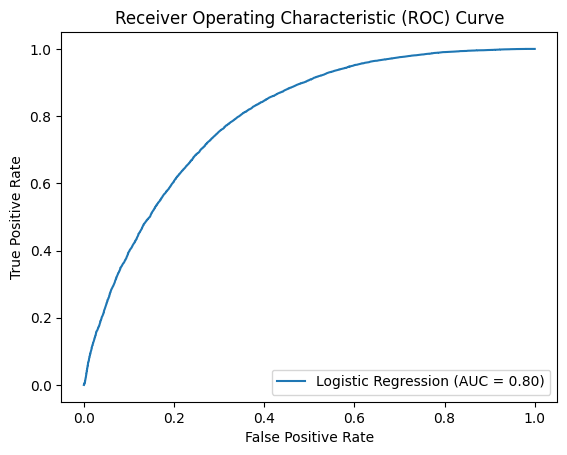

In [32]:
# 1 Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train[top_5_features], y_train)


# Make predictions on the test set
LR_test_y = model.predict(X_test[top_5_features])

# Evaluate the model on the accuracy
LR_accuracy = accuracy_score(y_test, LR_test_y)

LR_mse = mean_squared_error(y_test, LR_test_y)

confusion_matrix_LR = confusion_matrix(y_test, LR_test_y)

plot_roc_curve(model, X_test[top_5_features], y_test, 'Logistic Regression')
create_comparison_table(model,'Logistic Regression', LR_accuracy, y_test, LR_test_y)

In [33]:
LR_accuracy 

0.7248723292188609

In [34]:
LR_mse

0.2751276707811391

In [35]:
confusion_matrix_LR

array([[15596,  6197],
       [ 5817, 16057]])

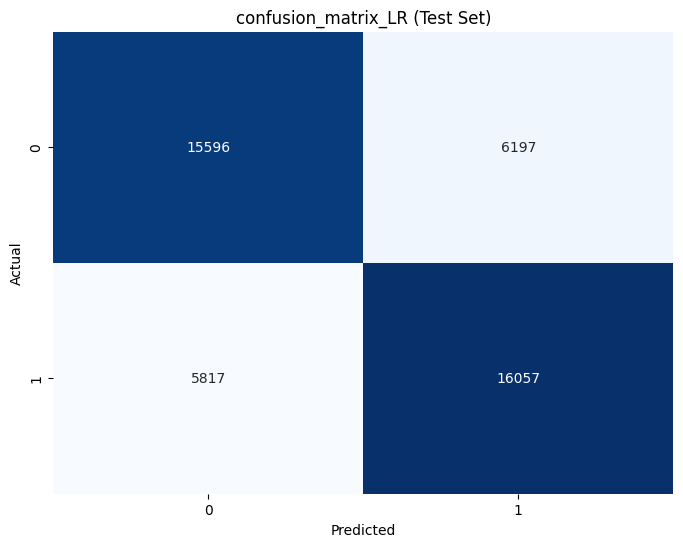

In [36]:
from sklearn.metrics import confusion_matrix

# Plot Confusion Matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_LR, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('confusion_matrix_LR (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Decision Tree - Pre Pruned
Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Accuracy Scores for Decision Tree - Pre Pruned: 0.7284765133387157
Cross-validated Accuracy Scores: [0.70313307 0.70313307 0.70313307 0.70313307 0.70313307 0.70313307
 0.70313307 0.70313307 0.70313307 0.70313307 0.70313307 0.70313307
 0.70313307 0.70313307 0.70313307 0.70313307 0.70313307 0.70313307
 0.70924501 0.70924501 0.70924501 0.70924501 0.70924501 0.70924501
 0.70924501 0.70924501 0.70924501 0.71432133 0.71432133 0.71432133
 0.71432133 0.71432133 0.71432133 0.71432133 0.71432133 0.71432133
 0.71432133 0.71432133 0.71432133 0.71432133 0.71432133 0.71432133
 0.71432133 0.71432133 0.71432133 0.71572592 0.71572592 0.71572592
 0.71572592 0.71572592 0.71572592 0.71572592 0.71572592 0.71572592
 0.71836458 0.71836458 0.71836458 0.71836458 0.71836458 0.71836458
 0.71836458 0.71836458 0.71836458 0.71836458 0.71836458 0.71836458
 0.718364

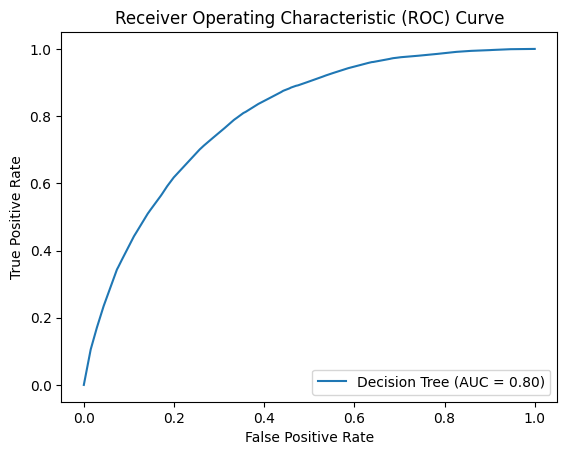

In [37]:
from sklearn.model_selection import GridSearchCV

# 2 the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score

# Define the parameter grid for the Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'max_features': ['sqrt', 'log2', None]
}
# Initialize the Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train[top_5_features], y_train)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(tree, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train[top_5_features], y_train)

# Get the best parameters and the cross-validated accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print("Decision Tree - Pre Pruned")
print("Best Parameters:", best_params)
print("Accuracy Scores for Decision Tree - Pre Pruned:", best_score)
print("Cross-validated Accuracy Scores:", grid_search.cv_results_['mean_test_score'])

# Evaluate the best model on the test set
best_tree = grid_search.best_estimator_
Tree_test_y = best_tree.predict(X_test[top_5_features])

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, Tree_test_y)

confusion_matrix_tree = confusion_matrix(y_test, Tree_test_y)

plot_roc_curve(best_tree, X_test[top_5_features], y_test, 'Decision Tree')
create_comparison_table(best_tree,'Decision Tree', test_accuracy, y_test, Tree_test_y)

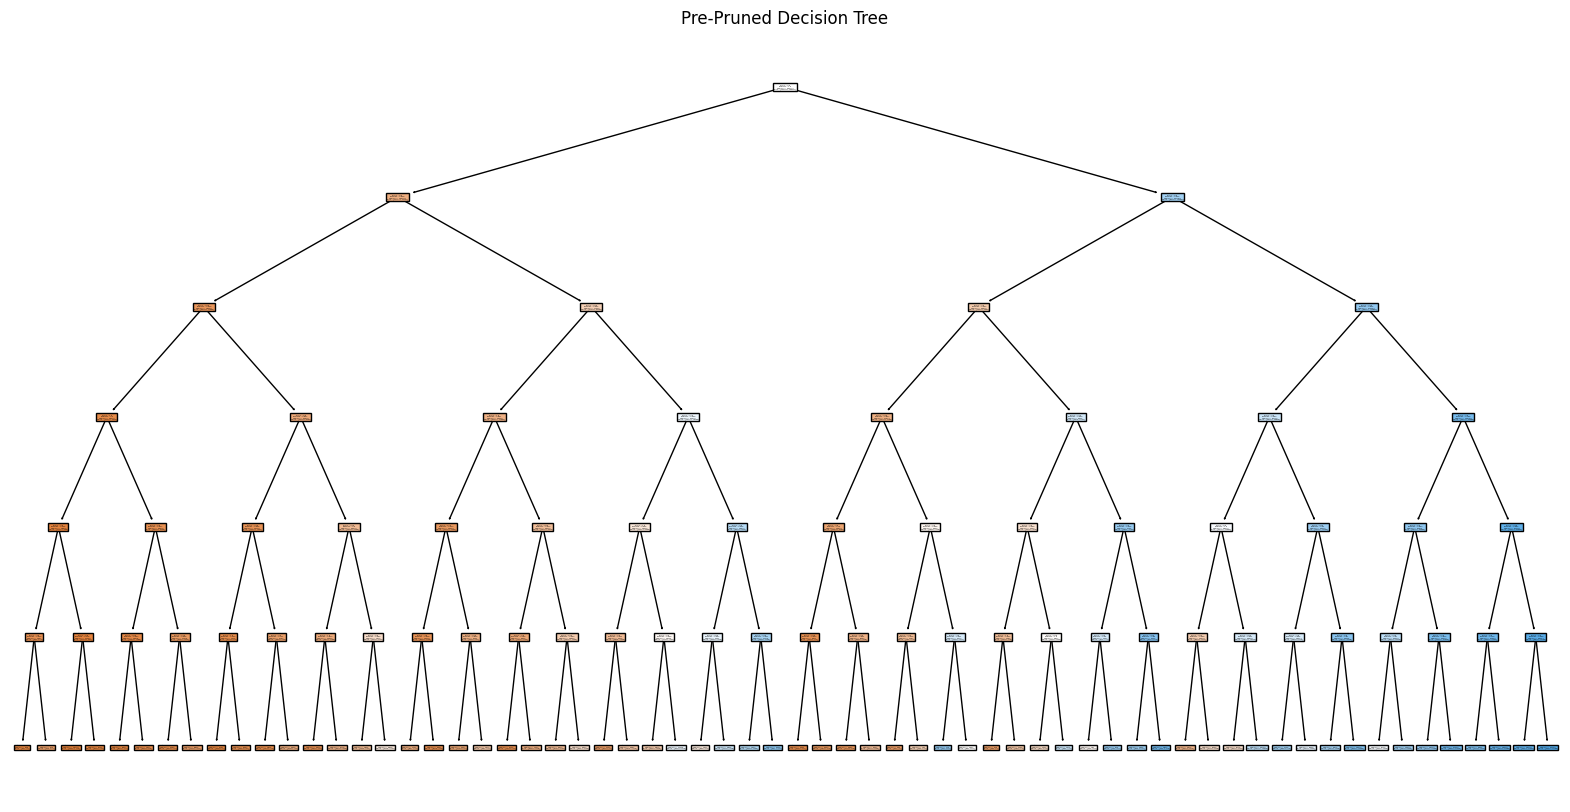

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  

# Plot the decision tree 
plot_tree(best_tree, filled=True)

# Set the title of the plot
plt.title("Pre-Pruned Decision Tree")

# Save the plot
plt.savefig('pre_pruned_decision_tree.png')
# Show the plot
plt.show()


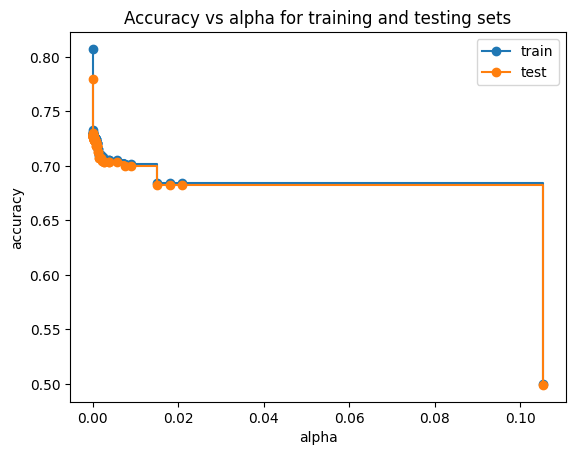

Best alpha for post-pruning: 0.0
Accuracy of the best post-pruned tree: 0.7798108411386173


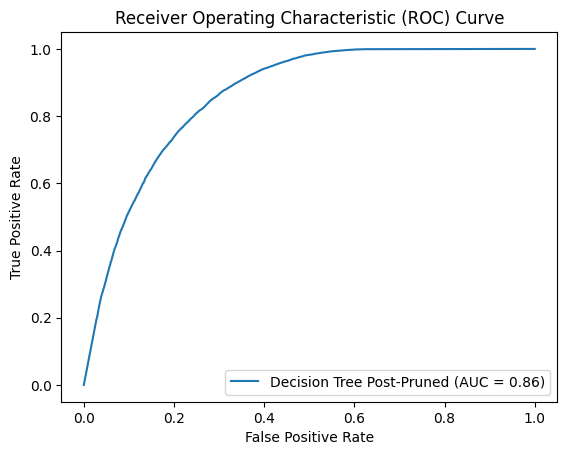

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


# Post-pruning: Cost Complexity Pruning
path = best_tree.cost_complexity_pruning_path(X_train[top_5_features], y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a decision tree for each alpha and store it
trees = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train[top_5_features], y_train)
    trees.append(clf)

# Evaluate each tree
train_scores = [accuracy_score(y_train, clf.predict(X_train[top_5_features])) for clf in trees]
test_scores = [accuracy_score(y_test, clf.predict(X_test[top_5_features])) for clf in trees]

# Plotting the accuracy vs alpha for training and testing sets
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Select the tree with the highest test score
best_alpha = ccp_alphas[test_scores.index(max(test_scores))]
best_post_pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
best_post_pruned_tree.fit(X_train[top_5_features], y_train)

# Evaluate the best post-pruned tree on the test set
Tree_test_y_post_pruned = best_post_pruned_tree.predict(X_test[top_5_features])
test_accuracy_post_pruned = accuracy_score(y_test, Tree_test_y_post_pruned)

# Compare the results
print("Best alpha for post-pruning:", best_alpha)
print("Accuracy of the best post-pruned tree:", test_accuracy_post_pruned)

# Confusion matrix for the best post-pruned tree
confusion_matrix_tree_post_pruned = confusion_matrix(y_test, Tree_test_y_post_pruned)

# ROC Curve for the best post-pruned tree
plot_roc_curve(best_post_pruned_tree, X_test[top_5_features], y_test, 'Decision Tree Post-Pruned')

In [41]:
test_accuracy = accuracy_score(y_test, Tree_test_y)
print("Test Accuracy of the best Decision Tree model:", test_accuracy)

Test Accuracy of the best Decision Tree model: 0.7280097098495432


In [43]:
confusion_matrix_tree

array([[14543,  7250],
       [ 4627, 17247]])

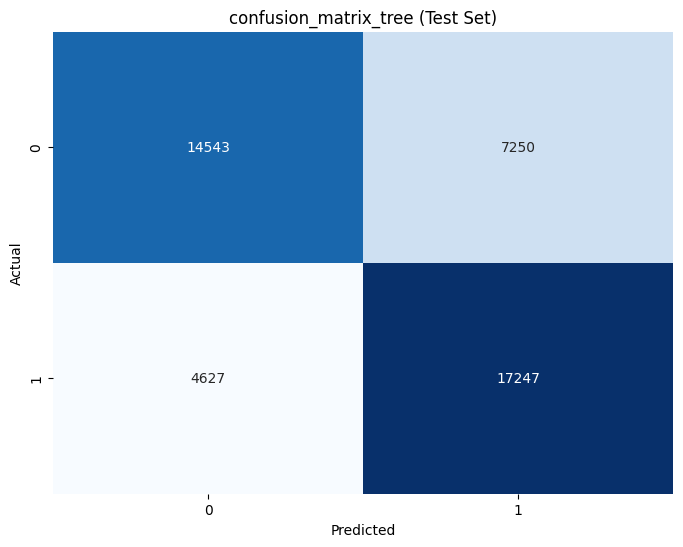

In [44]:
# Plot Confusion Matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('confusion_matrix_tree (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_tree.png')
plt.show()


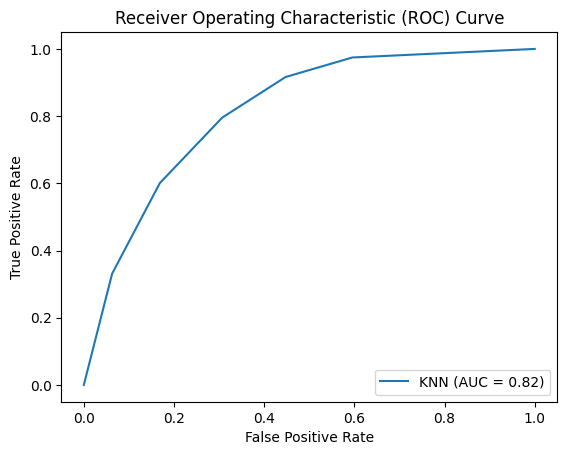

In [45]:
# 3 KNN 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train[top_5_features],y_train)

# Make predictions on the test set
knn_test_pred = knn_model.predict(X_test[top_5_features])

# Evaluate the model on the accuracy
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)

# MSE on the test set
knn_mse = mean_squared_error(y_test, knn_test_pred)

confusion_matrix_knn = confusion_matrix(y_test, knn_test_pred)

plot_roc_curve(knn_model, X_test[top_5_features], y_test, 'KNN')
create_comparison_table(model,'KNN', knn_test_accuracy, y_test, knn_test_pred)

In [46]:
knn_test_accuracy

0.7444294318363982

In [47]:
knn_mse

0.2555705681636018

In [48]:
confusion_matrix_knn

array([[15104,  6689],
       [ 4471, 17403]])

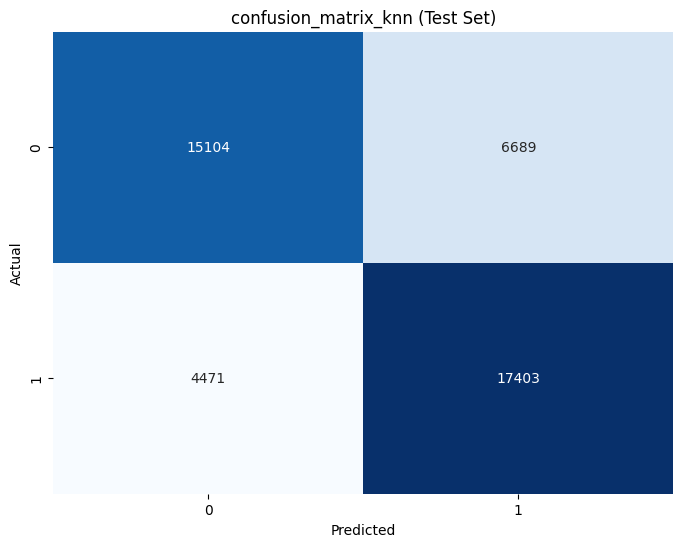

In [49]:
# Plot Confusion Matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('confusion_matrix_knn (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_knn.png')
plt.show()


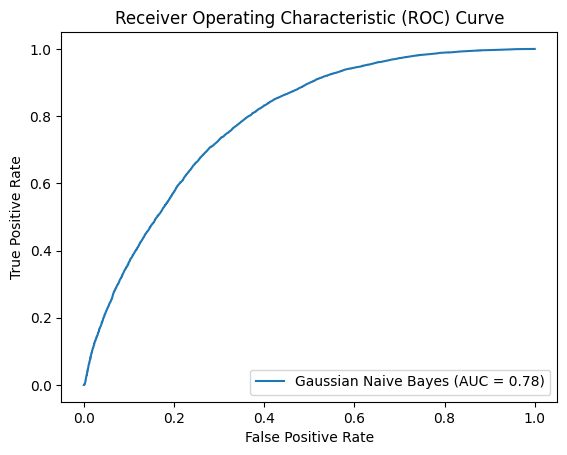

In [50]:
# 4 Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

#Create and train the Naive Bayes model
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train[top_5_features], y_train)

# Predict the values for test data
NaiveBayes_test_pred = NaiveBayes.predict(X_test[top_5_features])

# Evaluate the model on the accuracy
NB_accuracy_test = accuracy_score(y_test, NaiveBayes_test_pred)

# MSE on the test set
NaiveBayes_mse = mean_squared_error(y_test, NaiveBayes_test_pred)

confusion_matrix_NB = confusion_matrix(y_test, NaiveBayes_test_pred)

plot_roc_curve(NaiveBayes, X_test[top_5_features], y_test, 'Gaussian Naive Bayes')
create_comparison_table(model,'Gaussian Naive Bayes', NB_accuracy_test, y_test, NaiveBayes_test_pred)

In [51]:
NB_accuracy_test

0.7111548766803307

In [52]:
NaiveBayes_mse

0.28884512331966933

In [53]:
confusion_matrix_NB

array([[15909,  5884],
       [ 6729, 15145]])

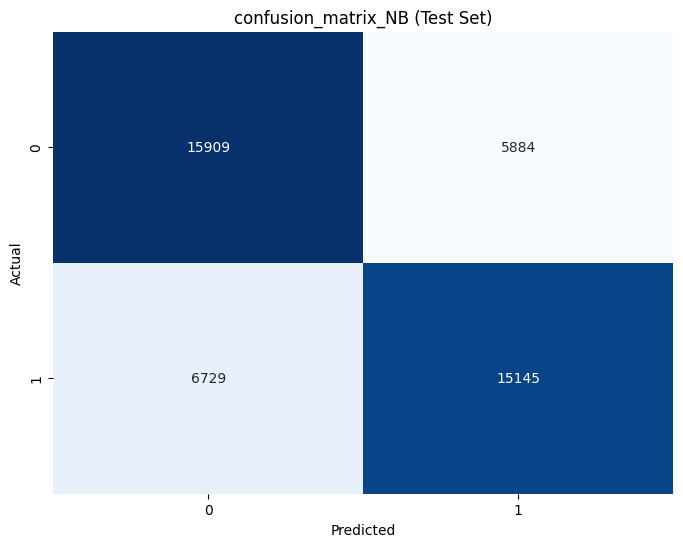

In [54]:
# Plot Confusion Matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_NB, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('confusion_matrix_NB (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_NB.png')

plt.show()


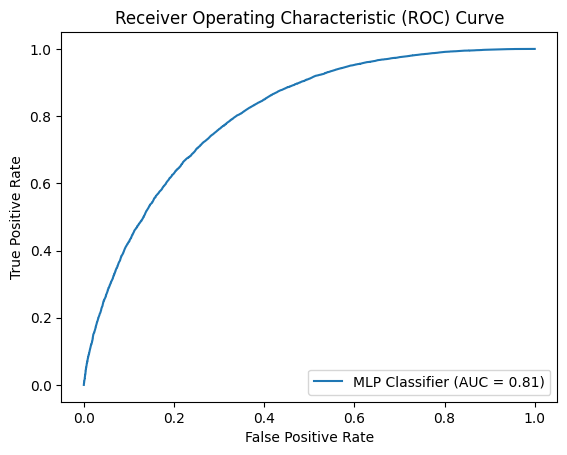

In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Flatten the y_train array
#y_train = y_train.ravel()


# Define the MLPClassifier
mlp_classifier = MLPClassifier(max_iter=500)

# Define the hyperparameters you want to tune
param_grid = {
    'hidden_layer_sizes': [(20, 20), (60, 40), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train[top_5_features], y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
mlp_test_pred = best_model.predict(X_test[top_5_features])

# Evaluate the performance on the accuracy
mlp_test_accuracy = accuracy_score(y_test, mlp_test_pred)

# Confusion Matrix for MLP model
confusion_matrix_mlp = confusion_matrix(y_test, mlp_test_pred)

# Classification Report for test set
class_report_test = classification_report(y_test, mlp_test_pred)

plot_roc_curve(best_model, X_test[top_5_features], y_test, 'MLP Classifier')
create_comparison_table(best_model,'MLP Classifier', mlp_test_accuracy, y_test, mlp_test_pred)

In [56]:
#Display the best hyperparameters
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (60, 40), 'learning_rate': 'constant', 'solver': 'adam'}


In [57]:
#Display the best model
best_model

MLPClassifier(alpha=0.001, hidden_layer_sizes=(60, 40), max_iter=500)

In [58]:
#Display test accuracy
print("Test Accuracy:", mlp_test_accuracy)

Test Accuracy: 0.7286280257402615


In [59]:
#Display the confusion matrix for test set
print("Confusion Matrix (Test Set):")
print(confusion_matrix_mlp)

Confusion Matrix (Test Set):
[[15964  5829]
 [ 6021 15853]]


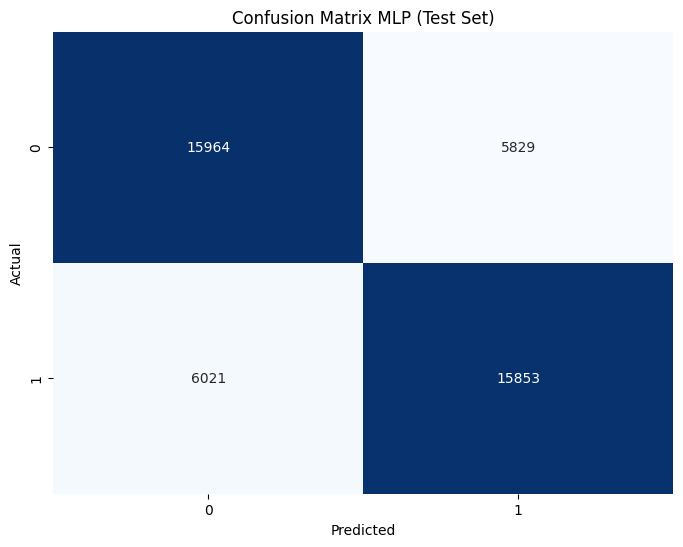

In [60]:
# Define a custom colormap with multiple colors

cmap = sns.color_palette("husl", 4)

# Plot the heatmap using the custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_mlp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix MLP (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the confusion matrix
plt.savefig('confusion_matrix_mlp.png')

# Display the confusion matrix 
plt.show()


In [61]:
#Display the classification report for the test set
print("Classification Report (Test Set):")
print(class_report_test)

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.73      0.73      0.73     21793
           1       0.73      0.72      0.73     21874

    accuracy                           0.73     43667
   macro avg       0.73      0.73      0.73     43667
weighted avg       0.73      0.73      0.73     43667



In [77]:
# Display the comparison table
comparison_table

Algorithm,Accuracy,Confusion Matrix,Precision,Recall,F1-score,ROC-AUC score,CV Scores
Logistic Regression,0.7248723292188609,[[15596 6197] [ 5817 16057]],0.721533207513256,0.7340678431013989,0.7277465554749819,0.7248552403227823,[0.74476149 0.74454393 0.74473859 0.74782728 0.74590361]
Decision Tree,0.7280097098495432,[[14543 7250] [ 4627 17247]],0.7040453933134669,0.7884703300722319,0.743870091220806,0.727897350141425,[0.7374104 0.73872719 0.73940275 0.7417013 0.73928526]
KNN,0.7444294318363982,[[15104 6689] [ 4471 17403]],0.7223559687863191,0.7956020846667277,0.7572118522386112,0.7443343328394896,[0.74476149 0.74454393 0.74473859 0.74782728 0.74590361]
Gaussian Naive Bayes,0.7111548766803307,[[15909 5884] [ 6729 15145]],0.7201959199201103,0.6923745085489622,0.7060112346455959,0.7111897780206382,[0.74476149 0.74454393 0.74473859 0.74782728 0.74590361]
MLP Classifier,0.7286280257402615,[[15964 5829] [ 6021 15853]],0.7311594871321834,0.7247417024778275,0.727936449628065,0.7286352480635823,[0.75632629 0.75780338 0.758582 0.76100672 0.75949527]


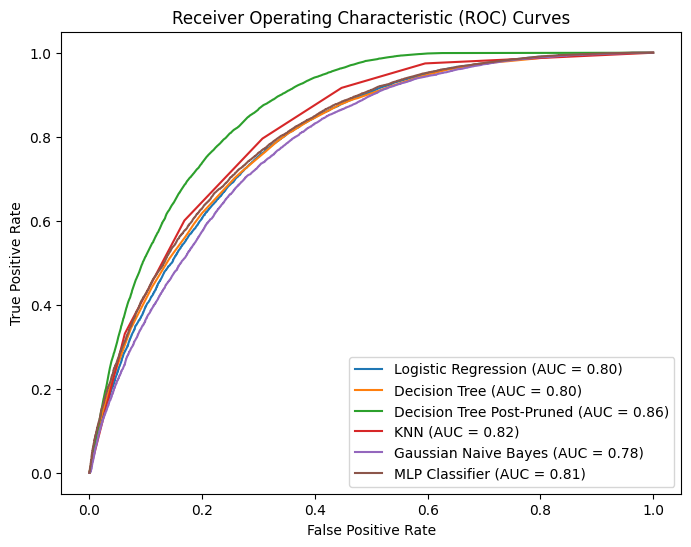

In [63]:
# Display ROC curve
# Plot all ROC curves together
plt.figure(figsize=(8, 6))
for model_name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{model_name} (AUC = {data["roc_auc"]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.savefig('ROC1.png')
plt.show()